# Exercise (Normal Distribution and Z Score for Outlier Removal)

You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

1. Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles
2. After removing outliers in step 1, you get a new dataframe.
3. On step(2) dataframe, use 4 standard deviation to remove outliers
4. Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram
5. On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dfWithOutliers = pd.read_csv("Files\\bhp.csv")
dfWithOutliers.shape

(13200, 7)

In [3]:
dfWithOutliers.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


### 1. Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

In [4]:
dfWithOutliers.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [5]:
# Setting the upper limit and lower limit using quantile() method to 0.999 and 0.001 respectively

lowerLimit, upperLimit = dfWithOutliers.price_per_sqft.quantile([0.001, 0.999])

print(f'Lower limit : {lowerLimit}\nUpper limit : {upperLimit}')

Lower limit : 1366.184
Upper limit : 50959.36200000098


In [6]:
# Finding the values which are beyond the lower limit and upper limit
dfWithOutliers[(dfWithOutliers.price_per_sqft < lowerLimit) | (dfWithOutliers.price_per_sqft > upperLimit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000


In [7]:
# Getting the count of rows outside the LIMITS
dfWithOutliers[(dfWithOutliers.price_per_sqft < lowerLimit) | (dfWithOutliers.price_per_sqft > upperLimit)].shape

(28, 7)

### 2. After removing outliers in step 1, you get a new dataframe.

In [8]:
# Storing the datas into new dataframe without the values which are outside the LIMITS [Data Cleaning]
dfWithoutOutliers = dfWithOutliers[(dfWithOutliers.price_per_sqft > lowerLimit) & (dfWithOutliers.price_per_sqft < upperLimit)]
dfWithoutOutliers.shape

(13172, 7)

### 3. On step(2) dataframe, use 4 standard deviation to remove outliers

In [9]:
dfWithoutOutliers.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [10]:
dfWithoutOutliers.price_per_sqft.describe()

count    13172.000000
mean      6663.653735
std       4141.020700
min       1379.000000
25%       4271.000000
50%       5438.000000
75%       7311.000000
max      50349.000000
Name: price_per_sqft, dtype: float64

In [11]:
# Calculating the mean and std. deviation
mean = dfWithoutOutliers.price_per_sqft.mean()
stdDev = dfWithoutOutliers.price_per_sqft.std()

# Getting the values which are below and above 4 standard deviation from mean. And will be considered as outliers
belowOutliers = mean - 4*stdDev
aboveOutliers = mean + 4*stdDev

print(f'Below outliers : {belowOutliers}\nAbove outliers : {aboveOutliers}')

Below outliers : -9900.429065502549
Above outliers : 23227.73653589429


In [12]:
# Getting the outliers based on the above condition
dfWithoutOutliers[(dfWithoutOutliers.price_per_sqft < belowOutliers) | (dfWithoutOutliers.price_per_sqft > aboveOutliers)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [13]:
# Removing the outliers from the dataframe and storing them into new one.
dfWithoutOutliers1 = dfWithoutOutliers[(dfWithoutOutliers.price_per_sqft > -9900.43) & (dfWithoutOutliers.price_per_sqft < 23227.74)]
dfWithoutOutliers1.shape

(13047, 7)

### 4. Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram


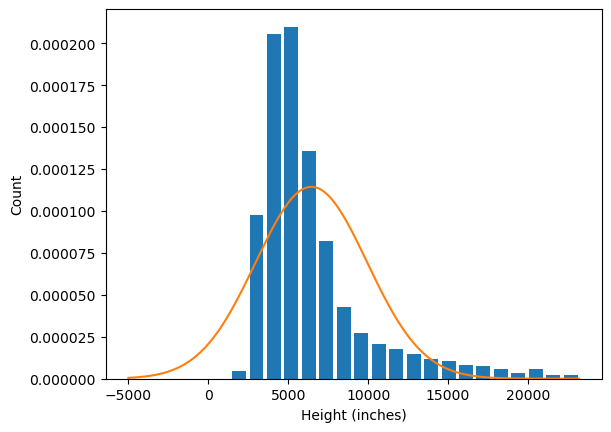

In [14]:
from scipy.stats import norm

plt.hist(dfWithoutOutliers1.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, dfWithoutOutliers1.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,dfWithoutOutliers1.price_per_sqft.mean(),dfWithoutOutliers1.price_per_sqft.std()))

### 5. On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [15]:
# Adding a new column named 'zscore' and calculates the value for it
dfWithoutOutliers['zscore'] = (dfWithoutOutliers.price_per_sqft - dfWithoutOutliers.price_per_sqft.mean()) / dfWithoutOutliers.price_per_sqft.std()
dfWithoutOutliers.sample(10)

C:\Users\prajw\AppData\Local\Temp\ipykernel_24060\4127420578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfWithoutOutliers['zscore'] = (dfWithoutOutliers.price_per_sqft - dfWithoutOutliers.price_per_sqft.mean()) / dfWithoutOutliers.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
12303,Padmanabhanagar,3 BHK,2051.0,3.0,170.0,3,8288,0.392257
7000,Devanahalli,2 BHK,1080.0,2.0,52.0,2,4814,-0.446666
268,Talaghattapura,3 BHK,1868.0,3.0,131.0,3,7012,0.084121
8133,other,3 BHK,1835.0,3.0,175.0,3,9536,0.693632
5981,BTM Layout,3 BHK,1776.0,2.0,75.0,3,4222,-0.589626
4113,other,4 Bedroom,971.0,2.0,135.0,4,13903,1.748203
4002,Electronic City,3 BHK,1156.0,2.0,44.0,3,3806,-0.690084
405,Sultan Palaya,2 Bedroom,550.0,1.0,62.0,2,11272,1.112853
11284,Electronic City Phase II,2 BHK,1252.0,2.0,67.0,2,5351,-0.316988
307,Panathur,2 BHK,1438.0,2.0,100.0,2,6954,0.070115


In [16]:
# Finding outliers based on Z-score
outliersZ = dfWithoutOutliers[(dfWithoutOutliers.zscore < -4) | (dfWithoutOutliers.zscore > 4)]
outliersZ.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,7.150495
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719,4.118633
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,6.037725


In [17]:
outliersZ.shape

(125, 8)

In [18]:
dfWithoutOutliers2 = dfWithoutOutliers[(dfWithoutOutliers.zscore > -4) & (dfWithoutOutliers.zscore < 4)]
dfWithoutOutliers2.shape

(13047, 8)